We want to try and see how the v-nullcline moves as a function of time, during a spiking event. 
The height of the nullcline is a function of I(t) + w(t) (also -u(t)). It also determines the stability regime of the system. 

For a selected spike time. Plot the trajectory in phase space of the neuron. Only need to consider v, u and time...



In [1]:
%matplotlib widget

#imports for AQUA
import sys
sys.path.append("..\\") # parent directory
from AQUA_class import AQUA
from plotting_functions import *


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import entropy
from scipy.ndimage import gaussian_filter
from tqdm import tqdm

import seaborn as sns
sns.set_theme(style = "white")


In [2]:
# simulation parameters
T = 2       # s
dt = 0.01   # ms
N_iter = int(T*1000/dt)

#Initialization variables.
x_start = np.array([-80, -30, 0]) # [v(0), u(0), w(0)]
t_start = np.array([0])

#injected current
I_h = 4
I_inj = I_h*np.ones(N_iter)

In [3]:
# neuron parameters.
# IB neuron...
a = 0.02
b = 0.2
c = -65
d = 8

#autaptic parameters
e = 0.1     
f = 4    
tau = 10    # ms 

Neuron = AQUA(a, b, c, d, e, f, tau)

Neuron.Initialise(x_start, t_start)

X, T, spike = Neuron.update_RK2(dt, N_iter, I_inj)

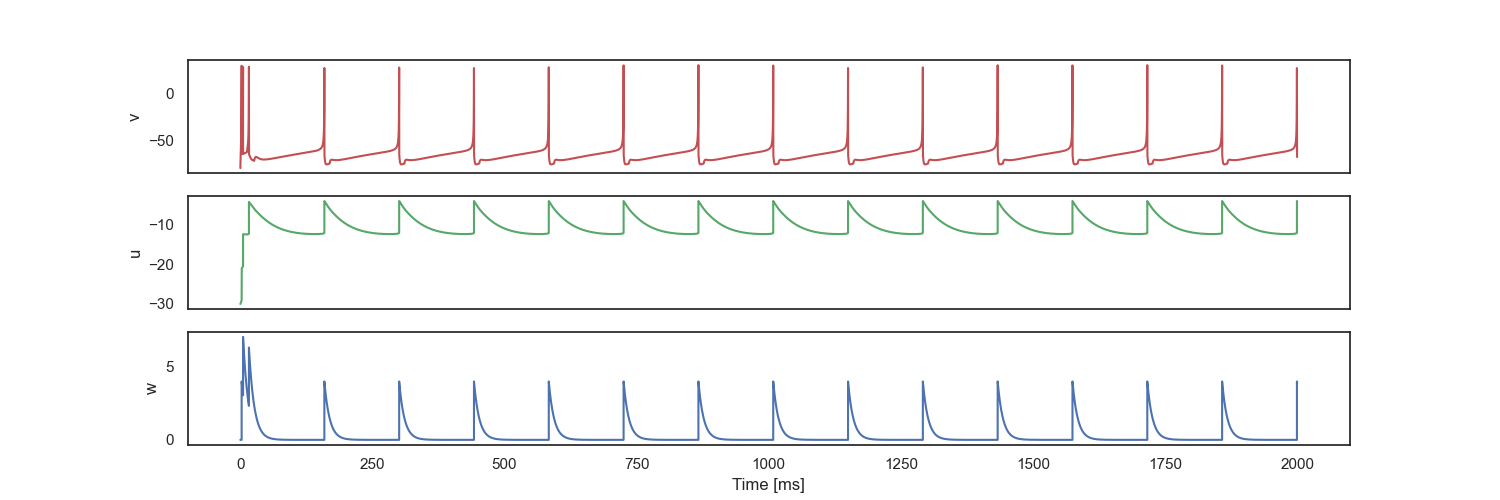

In [4]:
split = np.arange(0, 40000, 1)
fig, ax = plot_membrane_variables(X, T, [])

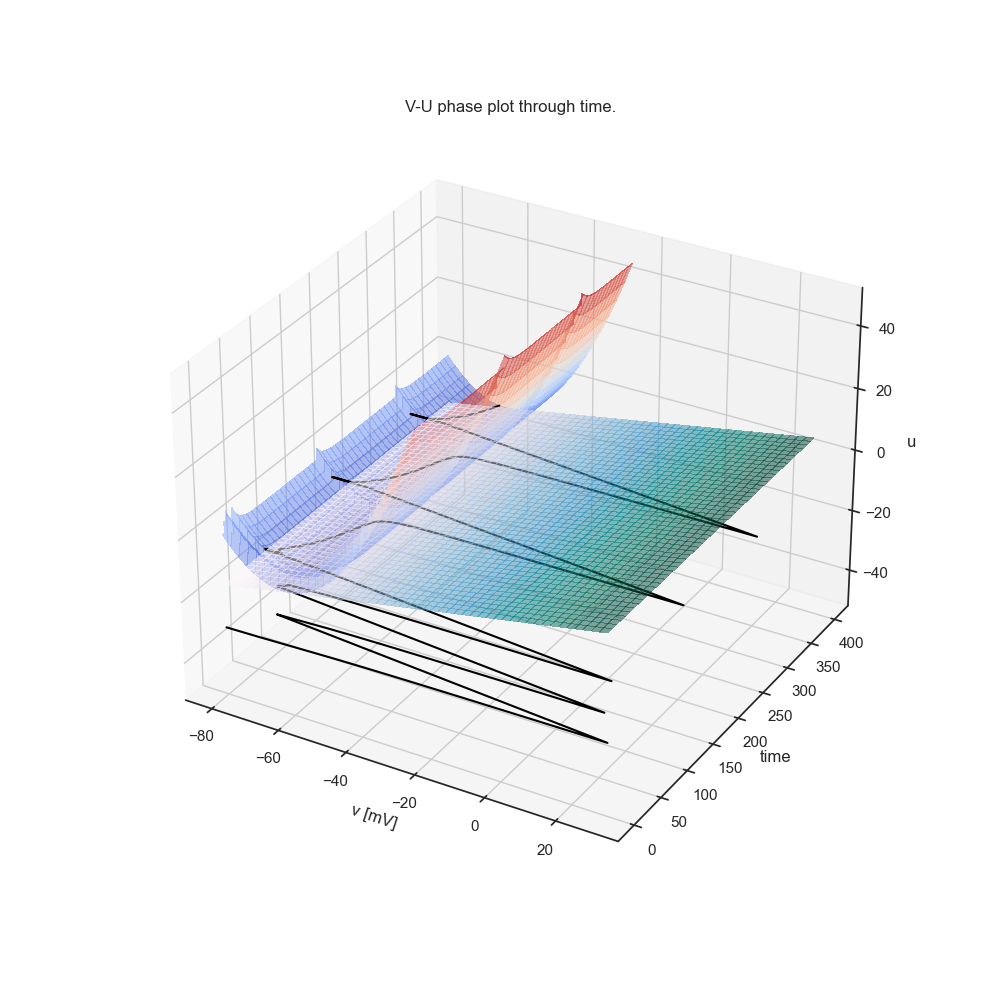

In [5]:

N_dim = 50
fig = plot_VUtime(X, T, split, I_inj, Neuron, N_dim)
plt.show()
